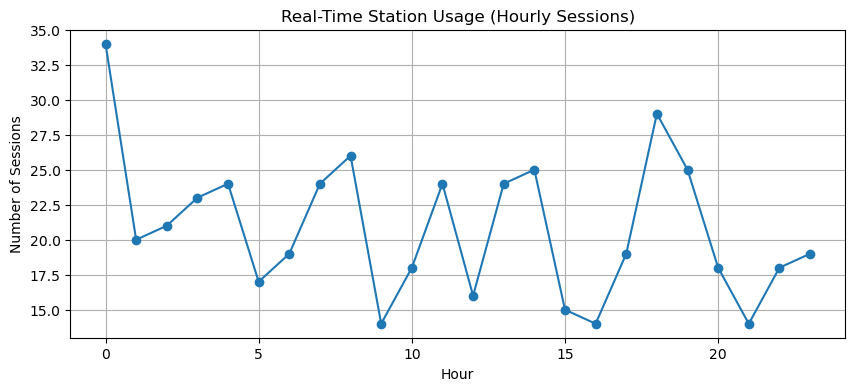

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("ev_charging_station_dataset.csv", parse_dates=["start_time","end_time"])

df['duration_min'] = (df['end_time'] - df['start_time']).dt.total_seconds()/60
df['hour'] = df['start_time'].dt.hour

#Analyze Real-Time Station Usage Logs
hourly_usage = df.groupby('hour')['session_id'].count().reset_index()

plt.figure(figsize=(10,4))
plt.plot(hourly_usage['hour'], hourly_usage['session_id'], marker='o')
plt.xlabel("Hour")
plt.ylabel("Number of Sessions")
plt.title("Real-Time Station Usage (Hourly Sessions)")
plt.grid(True)
plt.show()

In [22]:
df.head()


,session_id,station_id,start_time,end_time,queue_length,location_lat,location_lon,duration_min,hour
0,1,4,2025-01-01 20:20:00,2025-01-01 20:54:00,2,18.577969,73.759685,34.0,20
1,2,2,2025-01-12 22:50:00,2025-01-13 00:24:00,2,18.586618,73.760112,94.0,22
2,3,3,2025-01-02 10:05:00,2025-01-02 11:17:00,1,18.572200,73.793855,72.0,10
3,4,2,2025-01-04 22:31:00,2025-01-04 23:11:00,0,18.530424,73.752476,40.0,22
4,5,4,2025-01-07 06:26:00,2025-01-07 07:44:00,1,18.504667,73.797376,78.0,6


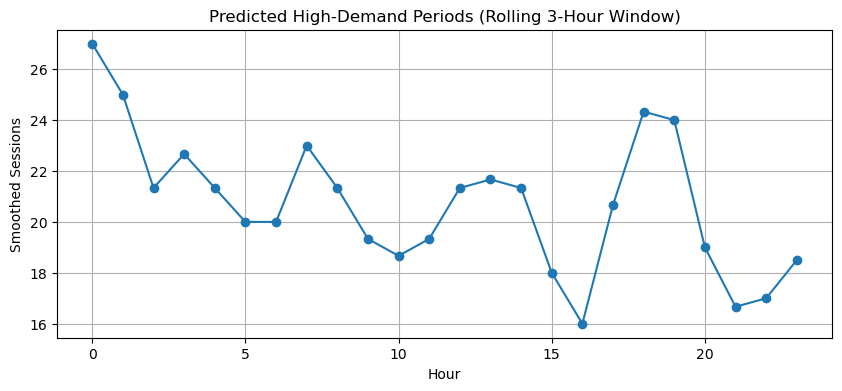

,hour,session_id,rolling_3h
0,0,34,27.000000
1,1,20,25.000000
18,18,29,24.333333
19,19,25,24.000000
7,7,24,23.000000


In [23]:
#Predict high-demand periods.
hourly_usage['rolling_3h'] = hourly_usage['session_id'].rolling(3, center=True, min_periods=1).mean()

plt.figure(figsize=(10,4))
plt.plot(hourly_usage['hour'], hourly_usage['rolling_3h'], marker='o')
plt.xlabel("Hour")
plt.ylabel("Smoothed Sessions")
plt.title("Predicted High-Demand Periods (Rolling 3-Hour Window)")
plt.grid(True)
plt.show()

predicted_peak_hours = hourly_usage.sort_values('rolling_3h', ascending=False).head(5)
predicted_peak_hours

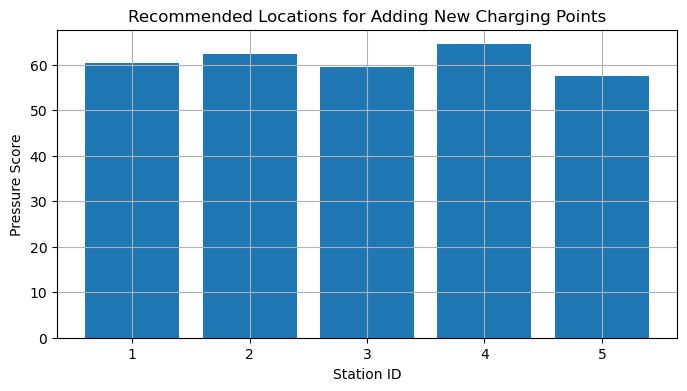

In [27]:
# ---------- RECOMMENDED LOCATIONS FOR NEW CHARGING POINTS ----------

# 1. Calculate average duration per station
station_load = df.groupby('station_id')['duration_min'].mean().reset_index()
station_load.rename(columns={'duration_min': 'avg_duration'}, inplace=True)

# 2. Calculate average queue length per station
station_queue = df.groupby('station_id')['queue_length'].mean().reset_index()
station_queue.rename(columns={'queue_length': 'avg_queue'}, inplace=True)

# 3. Merge both
recommend_locations = pd.merge(station_load, station_queue, on='station_id')

# 4. Create pressure score
recommend_locations['pressure_score'] = (
    recommend_locations['avg_duration'] * 0.6 +
    recommend_locations['avg_queue'] * 0.4
)

# 5. Plot bar chart
plt.figure(figsize=(8,4))
plt.bar(
    recommend_locations['station_id'].astype(str),
    recommend_locations['pressure_score']
)
plt.xlabel("Station ID")
plt.ylabel("Pressure Score")
plt.title("Recommended Locations for Adding New Charging Points")
plt.grid(True)
plt.show()



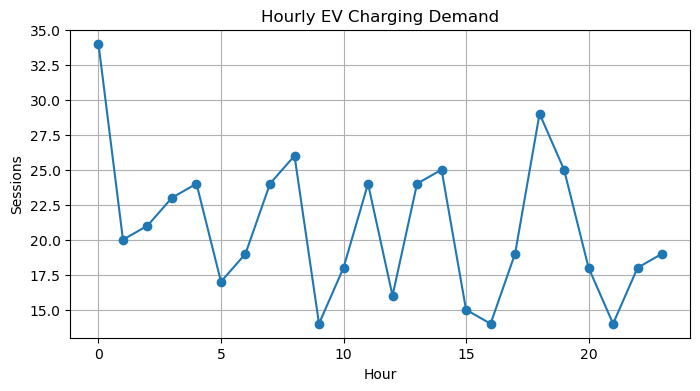

In [12]:
plt.figure(figsize=(8,4))
plt.plot(hourly['hour'], hourly['sessions'], marker='o')
plt.xlabel("Hour")
plt.ylabel("Sessions")
plt.title("Hourly EV Charging Demand")
plt.grid(True)
plt.show()


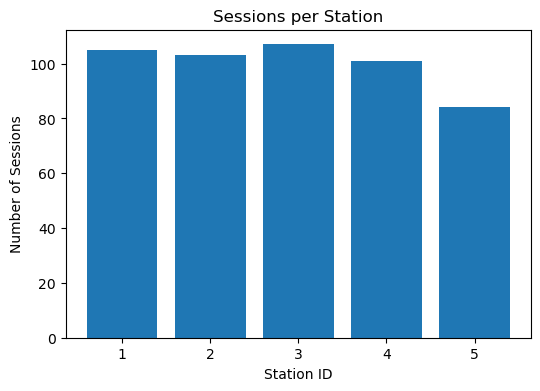

In [13]:
station_sessions = df['station_id'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(station_sessions.index, station_sessions.values)
plt.xlabel("Station ID")
plt.ylabel("Number of Sessions")
plt.title("Sessions per Station")
plt.show()


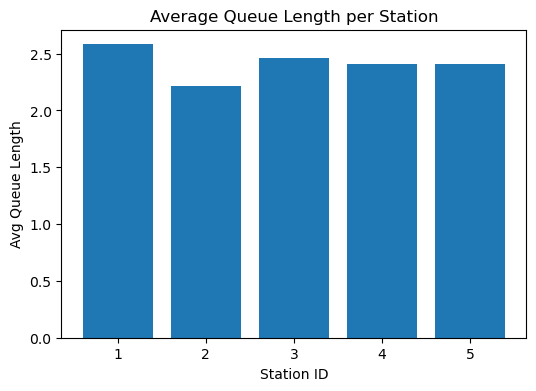

In [14]:
avg_queue = df.groupby('station_id')['queue_length'].mean()

plt.figure(figsize=(6,4))
plt.bar(avg_queue.index, avg_queue.values)
plt.xlabel("Station ID")
plt.ylabel("Avg Queue Length")
plt.title("Average Queue Length per Station")
plt.show()


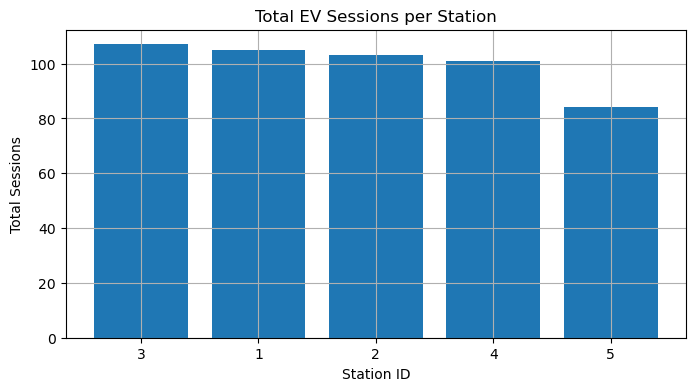

In [28]:
station_sessions = df['station_id'].value_counts().reset_index()
station_sessions.columns = ['station_id', 'total_sessions']

plt.figure(figsize=(8,4))
plt.bar(station_sessions['station_id'].astype(str), station_sessions['total_sessions'])
plt.xlabel("Station ID")
plt.ylabel("Total Sessions")
plt.title("Total EV Sessions per Station")
plt.grid(True)
plt.show()


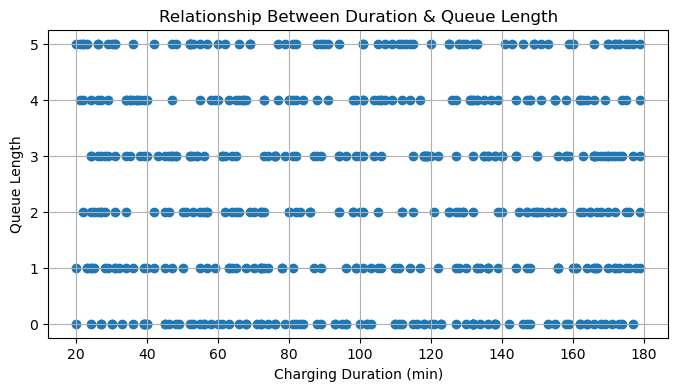

In [31]:
plt.figure(figsize=(8,4))
plt.scatter(df['duration_min'], df['queue_length'])
plt.xlabel("Charging Duration (min)")
plt.ylabel("Queue Length")
plt.title("Relationship Between Duration & Queue Length")
plt.grid(True)
plt.show()




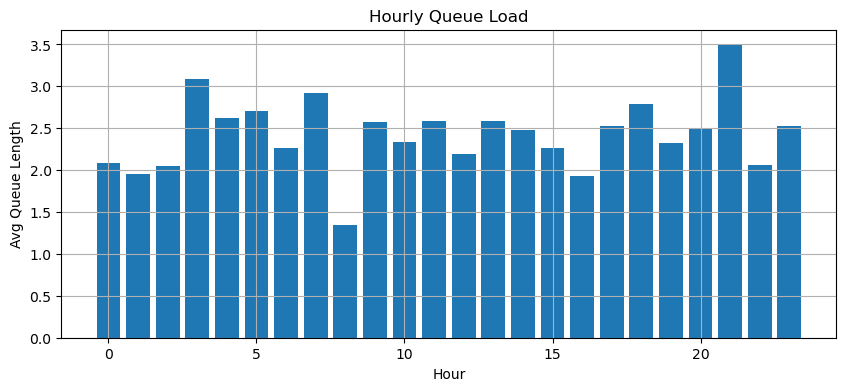

In [32]:
heatmap_data = df.groupby(['hour'])['queue_length'].mean().reset_index()

plt.figure(figsize=(10,4))
plt.bar(heatmap_data['hour'], heatmap_data['queue_length'])
plt.xlabel("Hour")
plt.ylabel("Avg Queue Length")
plt.title("Hourly Queue Load")
plt.grid(True)
plt.show()


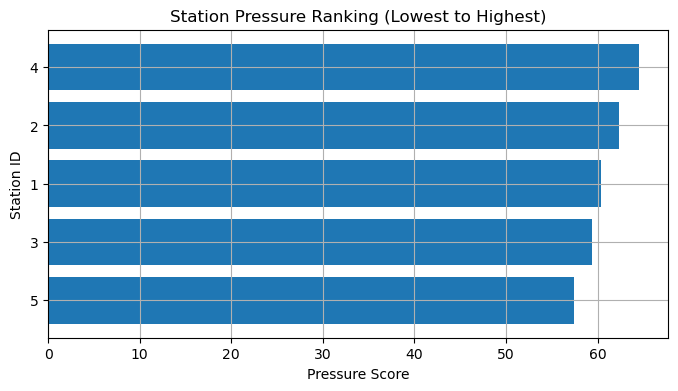

In [33]:
sorted_data = recommend_locations.sort_values('pressure_score', ascending=True)

plt.figure(figsize=(8,4))
plt.barh(sorted_data['station_id'].astype(str), sorted_data['pressure_score'])
plt.xlabel("Pressure Score")
plt.ylabel("Station ID")
plt.title("Station Pressure Ranking (Lowest to Highest)")
plt.grid(True)
plt.show()
